In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

In [4]:
from dgpy.domain import *

## Domain decomposition

Create a rectangular domain:

In [5]:
domain = Domain(extents=[(0, 1), (0, 2)], num_elements=2, num_points=3)

In [6]:
domain.dim

2

A domain is composed of elements:

In [7]:
len(domain.elements)

4

In [8]:
for element in domain.elements:
    print("Element {} extents:\n{}".format(element, element.extents))

Element (0, 0) extents:
[[0.  0.5]
 [0.  1. ]]
Element (0, 1) extents:
[[0.  0.5]
 [1.  2. ]]
Element (1, 0) extents:
[[0.5 1. ]
 [0.  1. ]]
Element (1, 1) extents:
[[0.5 1. ]
 [1.  2. ]]


An element has faces:

In [9]:
an_element = domain.indexed_elements[(0, 0)]
print("All faces:", list(an_element.faces))

All faces: [|^|, |v|, <|, |>, v, >]


Faces are categorized into _internal_, _external_, _interior_ and _exterior_. See the documentation of the functions used below for the distinction:

In [10]:
print("Internal faces (to other elements):", ", ".join(map(str, an_element.get_internal_faces())))
print("External faces (to domain boundary):", ", ".join(map(str, an_element.get_external_faces())))

Internal faces (to other elements): |v|, |>
External faces (to domain boundary): |^|, <|


In [11]:
print("Exterior (ghost) faces:", ", ".join(map(str, an_element.get_exterior_faces())))
print("Interior (non-ghost) faces:", ", ".join(map(str, an_element.get_interior_faces())))

Exterior (ghost) faces: v, >
Interior (non-ghost) faces: |^|, |v|, <|, |>


## Handling data on the domain

In [12]:
def scalar_field(x, amplitude):
    return amplitude * np.sin(x[0]) * np.sin(x[1])

In [13]:
def vector_field(x, amplitude):
    return amplitude * np.array([
        np.sin(x[0]),
        np.cos(x[1])
    ])

In [14]:
domain.set_data(scalar_field, 'u', amplitude=2)

In [15]:
domain.set_data(vector_field, 'v', amplitude=2)

The data is distributed to all elements in the domain and set for the specified attribute name:

In [16]:
domain.indexed_elements[(0,0)].u

array([[0.        , 0.        , 0.        ],
       [0.        , 0.23722355, 0.41636651],
       [0.        , 0.45969769, 0.80684536]])

In [17]:
domain.indexed_elements[(0,0)].v

array([[[0.        , 0.        , 0.        ],
        [0.49480792, 0.49480792, 0.49480792],
        [0.95885108, 0.95885108, 0.95885108]],

       [[2.        , 1.75516512, 1.08060461],
        [2.        , 1.75516512, 1.08060461],
        [2.        , 1.75516512, 1.08060461]]])

We can quickly plot a field on the domain:

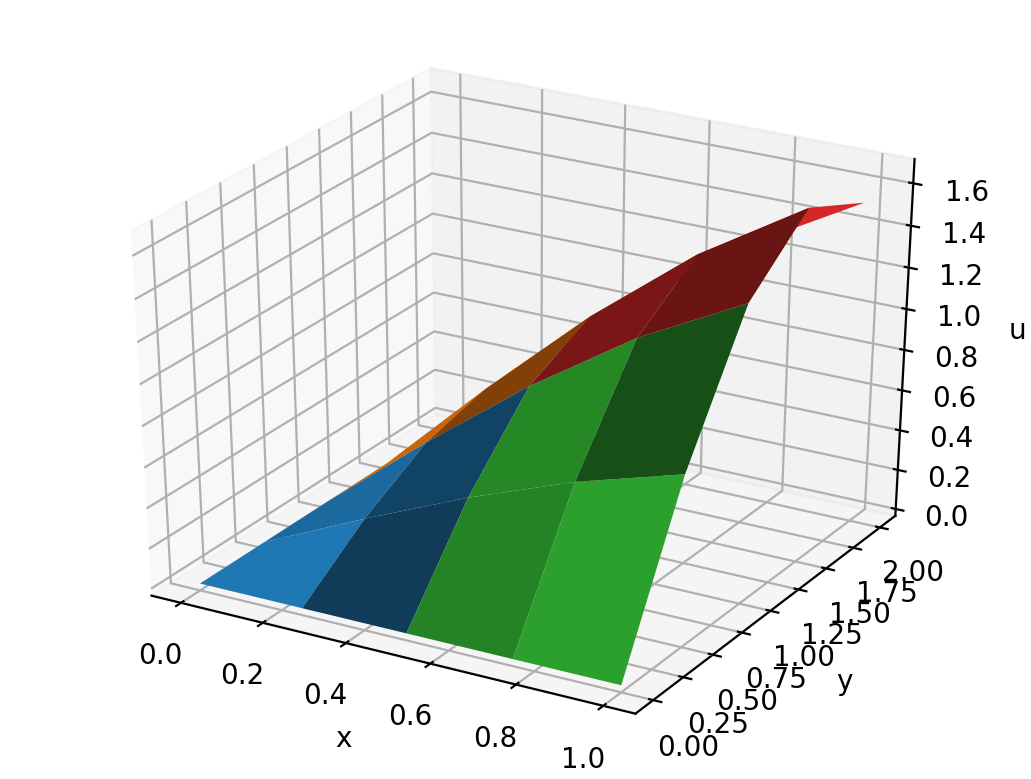

In [18]:
domain.plot('u');

We can also retrieve the entire dataset of a field across all elements as a flat array:

In [19]:
domain.get_data('u')

array([0.        , 0.        , 0.        , 0.        , 0.23722355,
       0.41636651, 0.        , 0.45969769, 0.80684536, 0.        ,
       0.        , 0.        , 0.41636651, 0.49356842, 0.44992757,
       0.80684536, 0.95644914, 0.87188082, 0.        , 0.45969769,
       0.80684536, 0.        , 0.65359006, 1.14715848, 0.        ,
       0.80684536, 1.41614684, 0.80684536, 0.95644914, 0.87188082,
       1.14715848, 1.35986249, 1.23962474, 1.41614684, 1.67872618,
       1.5302948 ])

In [20]:
domain.get_data('v')

array([ 0.        ,  0.        ,  0.        ,  0.49480792,  0.49480792,
        0.49480792,  0.95885108,  0.95885108,  0.95885108,  2.        ,
        1.75516512,  1.08060461,  2.        ,  1.75516512,  1.08060461,
        2.        ,  1.75516512,  1.08060461,  0.        ,  0.        ,
        0.        ,  0.49480792,  0.49480792,  0.49480792,  0.95885108,
        0.95885108,  0.95885108,  1.08060461,  0.1414744 , -0.83229367,
        1.08060461,  0.1414744 , -0.83229367,  1.08060461,  0.1414744 ,
       -0.83229367,  0.95885108,  0.95885108,  0.95885108,  1.36327752,
        1.36327752,  1.36327752,  1.68294197,  1.68294197,  1.68294197,
        2.        ,  1.75516512,  1.08060461,  2.        ,  1.75516512,
        1.08060461,  2.        ,  1.75516512,  1.08060461,  0.95885108,
        0.95885108,  0.95885108,  1.36327752,  1.36327752,  1.36327752,
        1.68294197,  1.68294197,  1.68294197,  1.08060461,  0.1414744 ,
       -0.83229367,  1.08060461,  0.1414744 , -0.83229367,  1.08

The `set_data` method also accepts a flat array of numeric data instead of a function:

In [21]:
domain.set_data(domain.get_data('u')**2, 'u_squared')

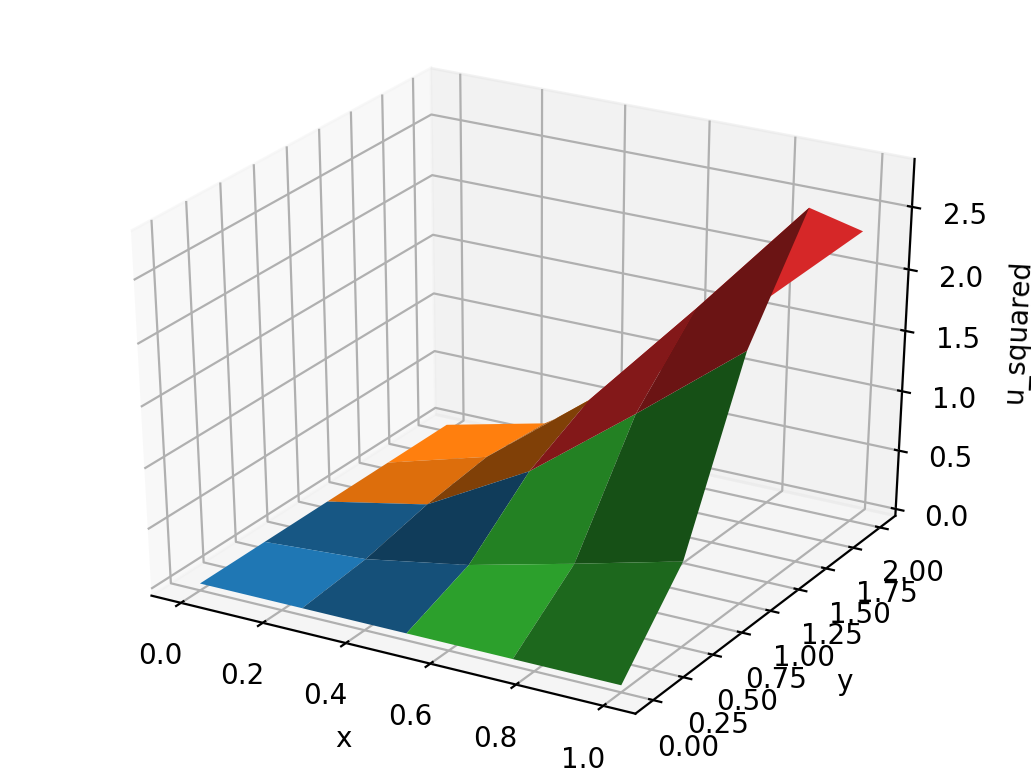

In [22]:
domain.plot('u_squared')

## Plotting

Plotting of fields on the domain works best in 1D, and preliminarily also in 2D and 3D:

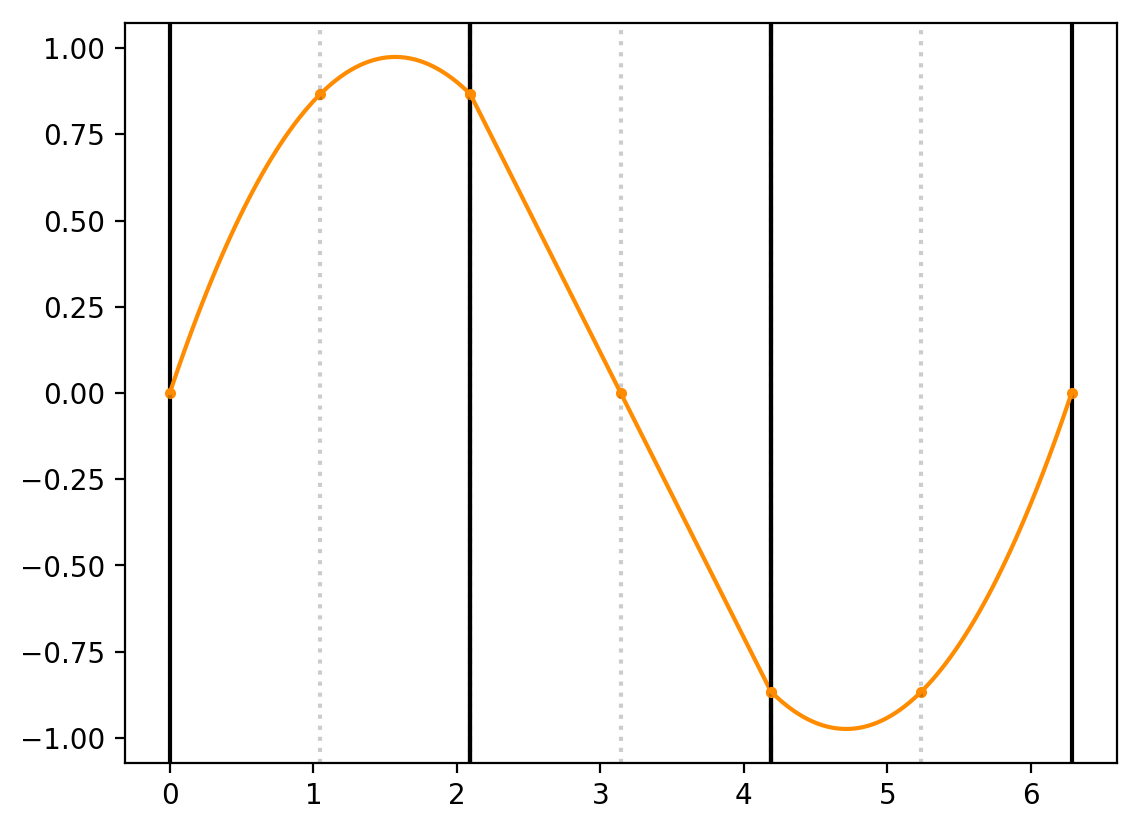

In [23]:
domain_1d = Domain(extents=[(0, 2 * np.pi)], num_elements=3, num_points=3)
domain_1d.set_data(lambda x: np.sin(x[0]), 'u')
domain_1d.plot('u', label='u');

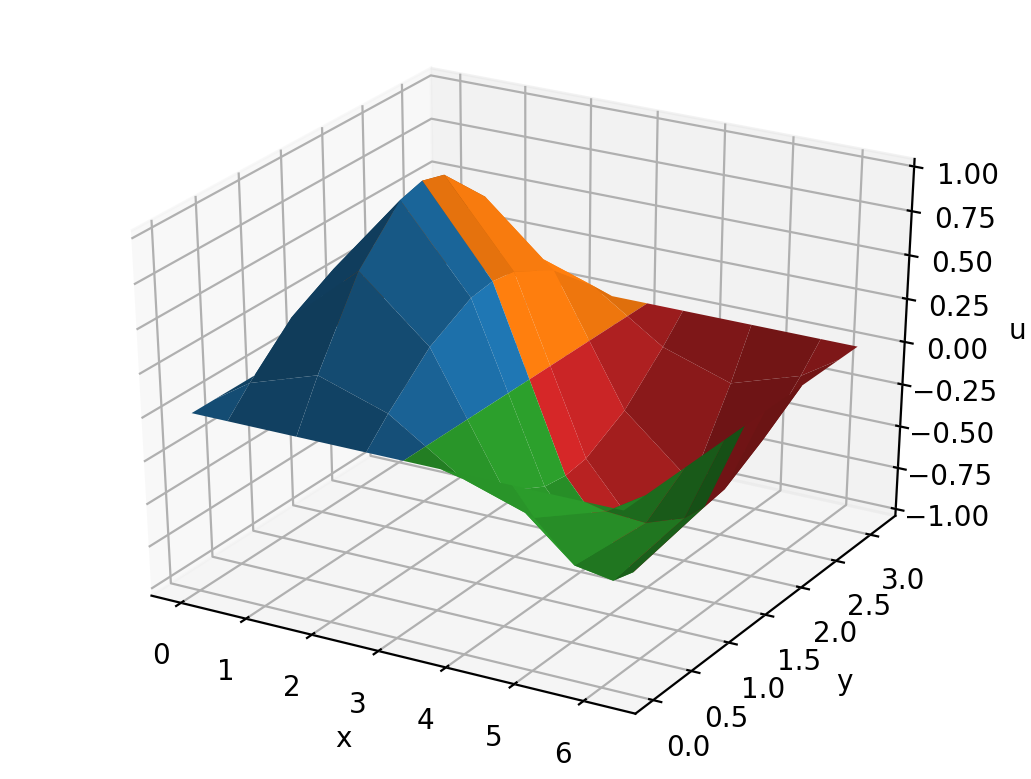

In [24]:
domain_2d = Domain(extents=[(0, 2 * np.pi), (0, np.pi)], num_elements=2, num_points=5)
domain_2d.set_data(lambda x: np.sin(x[0]) * np.sin(x[1]), 'u')
domain_2d.plot('u');

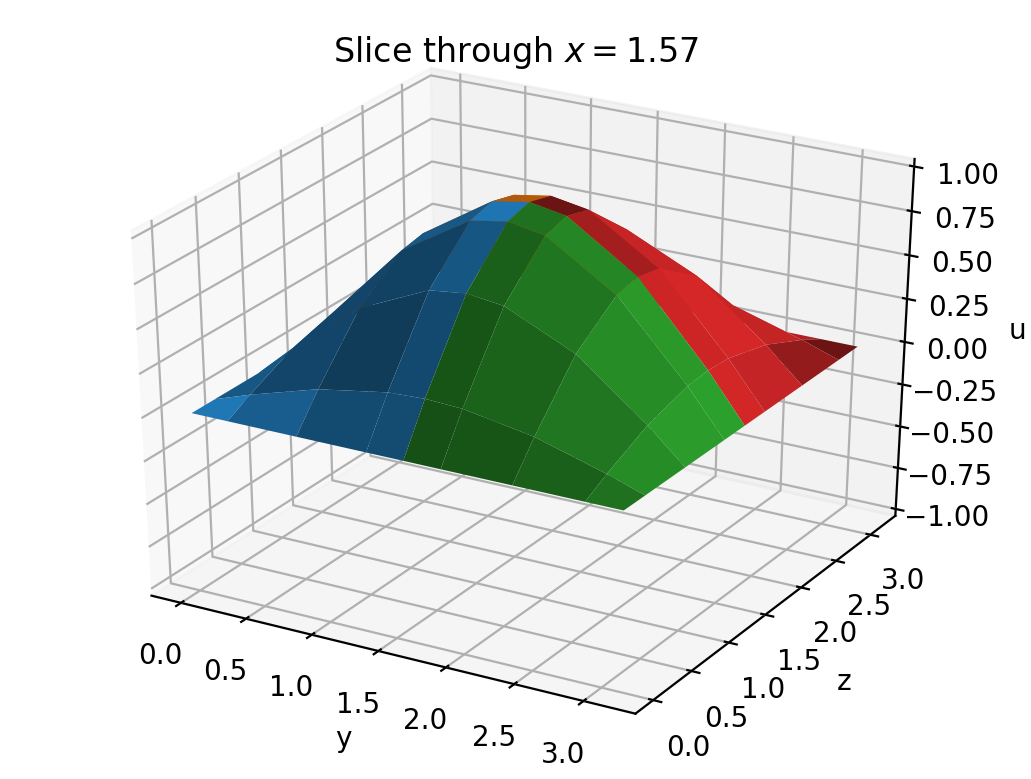

In [25]:
domain_3d = Domain(extents=[(0, 2 * np.pi), (0, np.pi), (0, np.pi)], num_elements=2, num_points=5)
domain_3d.set_data(lambda x: np.sin(x[0]) * np.sin(x[1]) * np.sin(x[2]), 'u')
domain_3d.plot('u', slice_dim=0, slice_index=2);

## Applying operators on elements

In [26]:
from dgpy.operators import *

In [27]:
domain = Domain(extents=[(0, 2 * np.pi)], num_elements=3, num_points=5)

In [28]:
def sin_1d(x):
    return np.sin(x[0])

In [29]:
domain.set_data(sin_1d, 'u')

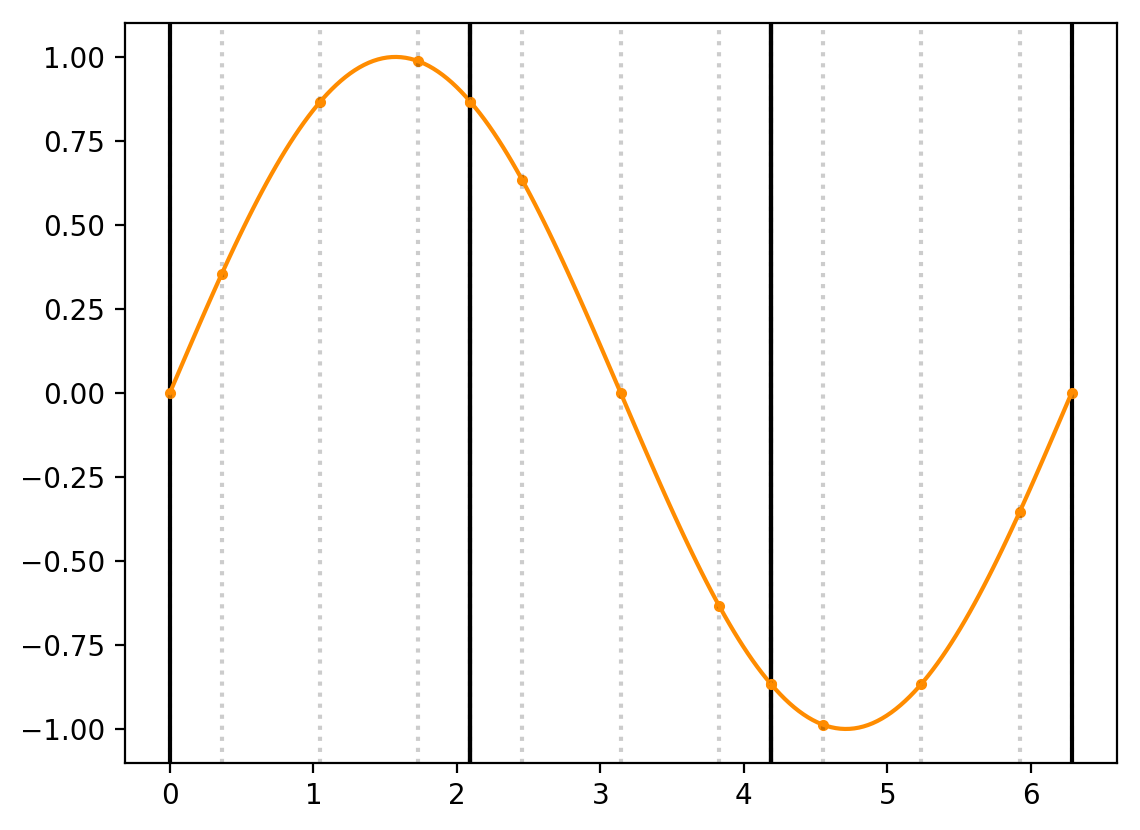

In [30]:
domain.plot('u');

Let's compute the gradient of the field `u`:

In [31]:
for element in domain.elements:
    element.du = compute_deriv(element.u, element)

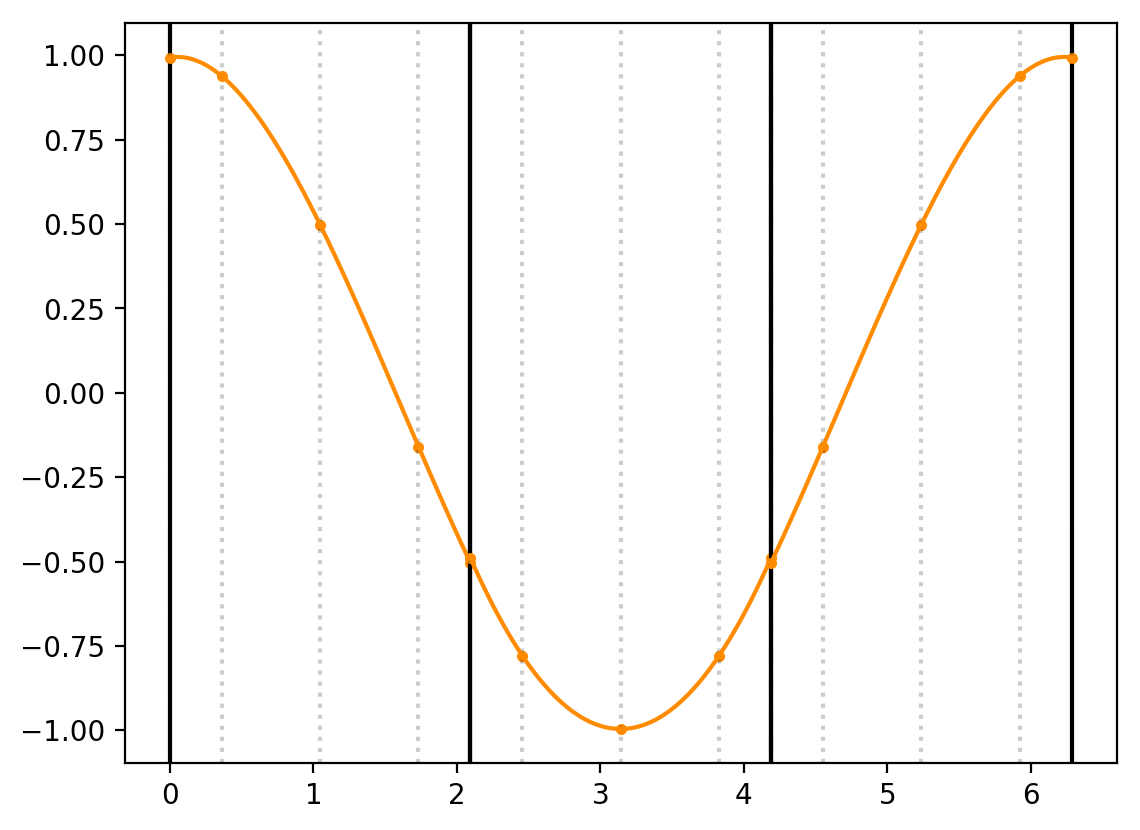

In [32]:
# The gradient is a vector field, so we have to take its x-component
domain.plot('du', field_slice=np.s_[0]);

## Applying operators to element faces

In [34]:
for element in domain.elements:
    # When slicing to interior faces, we just set the field value on the face.
    # But on exterior (ghost-) faces, i.e. on domain boundaries, we set the _negative_
    # field value on the face. Therefore, the face.average evaluates to zero on those
    # faces. This behaviour corresponds to homogeneous/zero Dirichlet boundary conditions.
    element.slice_to_faces('u', 'any')
    # This behaviour is avoided when only slicing to interior faces. Since no data is
    # provided on the exterior (ghost-) faces, both face.average and face.jump just
    # evaluate to the interior field value. This corresponds to "free" boundary conditions.
    element.slice_to_faces('du', 'interior')
# Once the variables have been sliced to the faces of _all_ elements, we can iterate over
# the elements again to evaluate averages and jumps:
for element in domain.elements:
    element.u_flux = np.zeros(element.num_points)
    element.du_flux = np.zeros(element.num_points)
    for face in element.get_interior_faces():
        element.u_flux += compute_inverse_mass(lift_flux(face.average('u'), face), element)
        element.du_flux += compute_inverse_mass(lift_flux(face.normal_dot(face.average('du')), face), element)

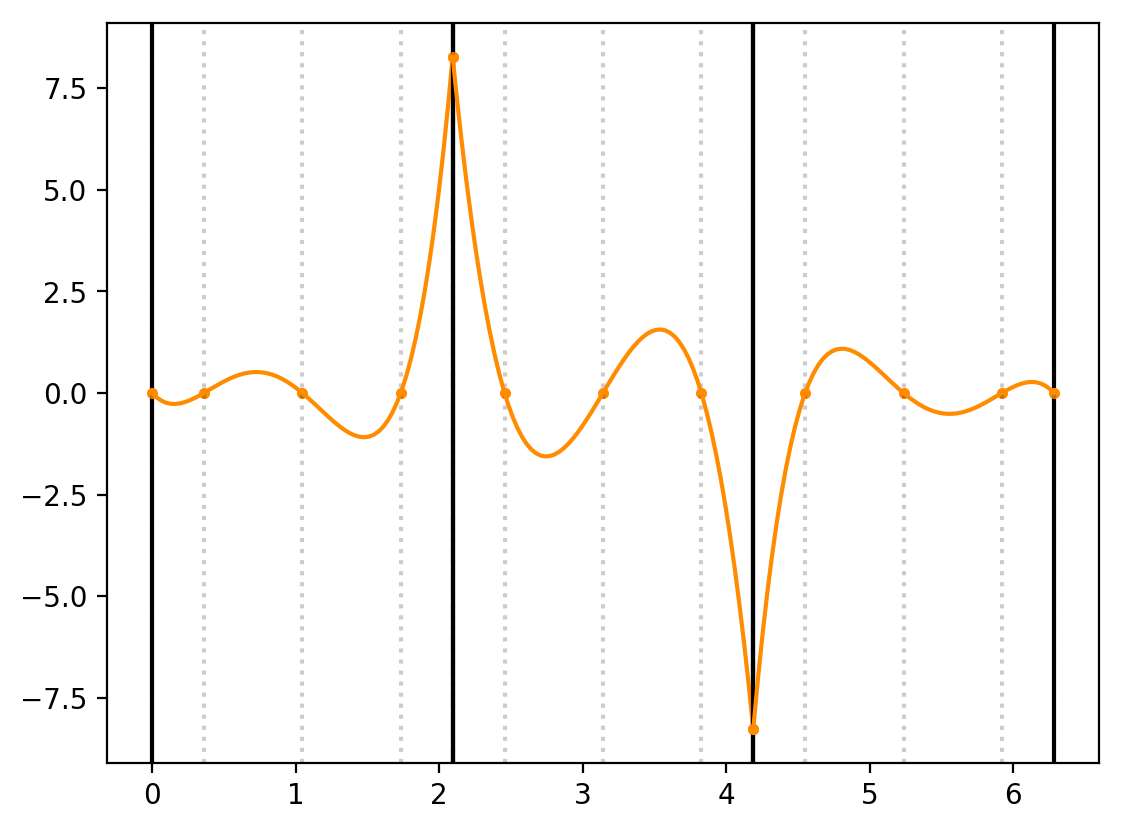

In [35]:
domain.plot('u_flux');

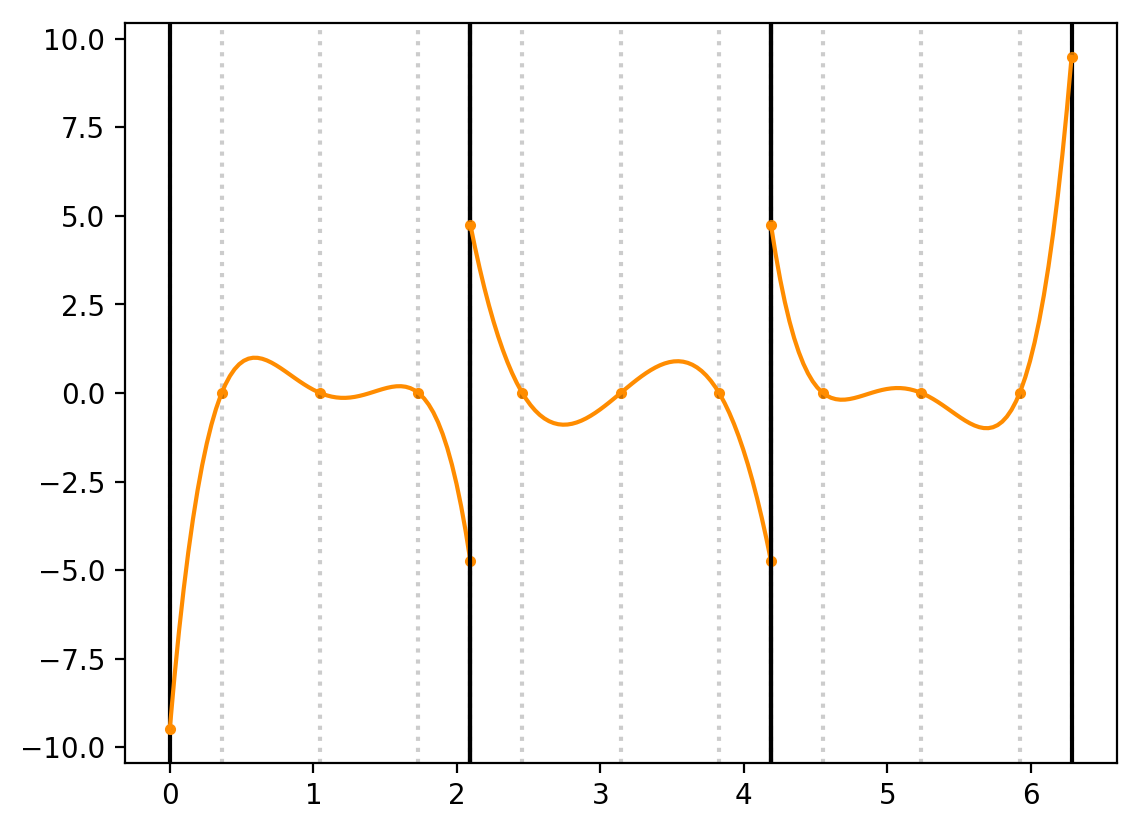

In [36]:
domain.plot('du_flux');